<a href="https://colab.research.google.com/github/ArthAgrawal/Digit_Classifier/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Tensorflow 2.0
import tensorflow as tf

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 2s 0us/step


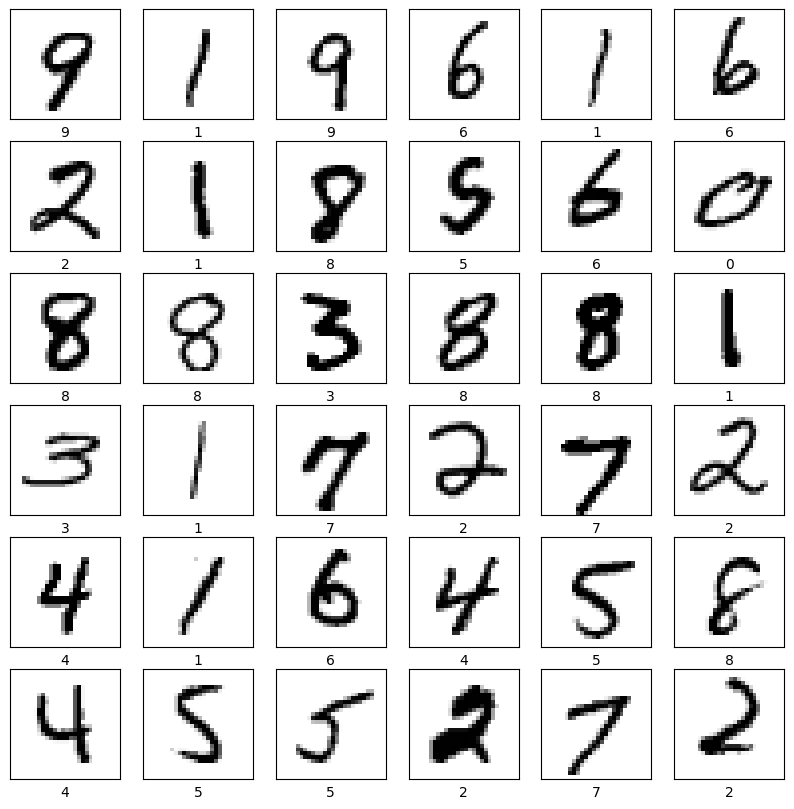

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [4]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Define the first convolutional layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

        # Define the first max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        # Define the second max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification probabilities
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())


1/1 [==============================] - 3s 3s/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense

In [5]:
# Define the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [6]:
cnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1300 - accuracy: 0.9607 - val_loss: 0.0711 - val_accuracy: 0.9774
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0285 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0323 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0441 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0309 - val_accuracy

In [7]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9911
Test accuracy: 0.991100013256073


In [8]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [9]:
predictions[0]

array([2.2591835e-13, 4.2568316e-10, 1.1147926e-13, 2.7642120e-12,
       2.2594810e-09, 1.4476248e-12, 1.6949957e-21, 1.0000000e+00,
       4.0944984e-13, 3.0891886e-08], dtype=float32)

In [10]:
# Get the model's prediction probabilities for the first image in the test dataset
prediction = cnn_model.predict(test_images[[0]])

# Find the index of the class with the highest probability
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)


1/1 [==============================] - 0s 20ms/step
Predicted digit: 7


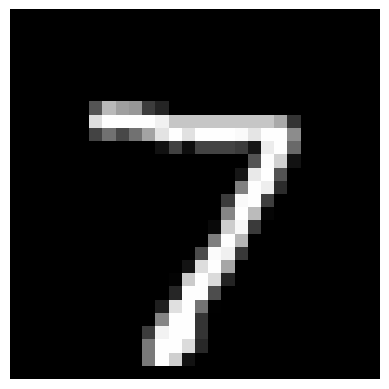

In [12]:
import matplotlib.pyplot as plt

# Plot the first image in the test dataset
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()


Label of this digit is: 7


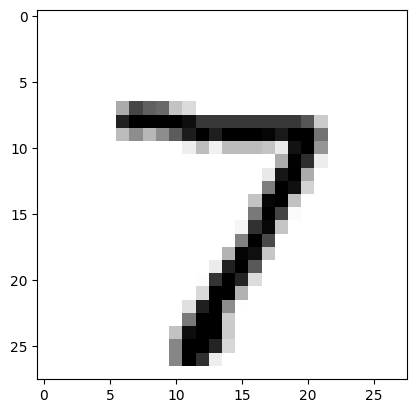

In [14]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

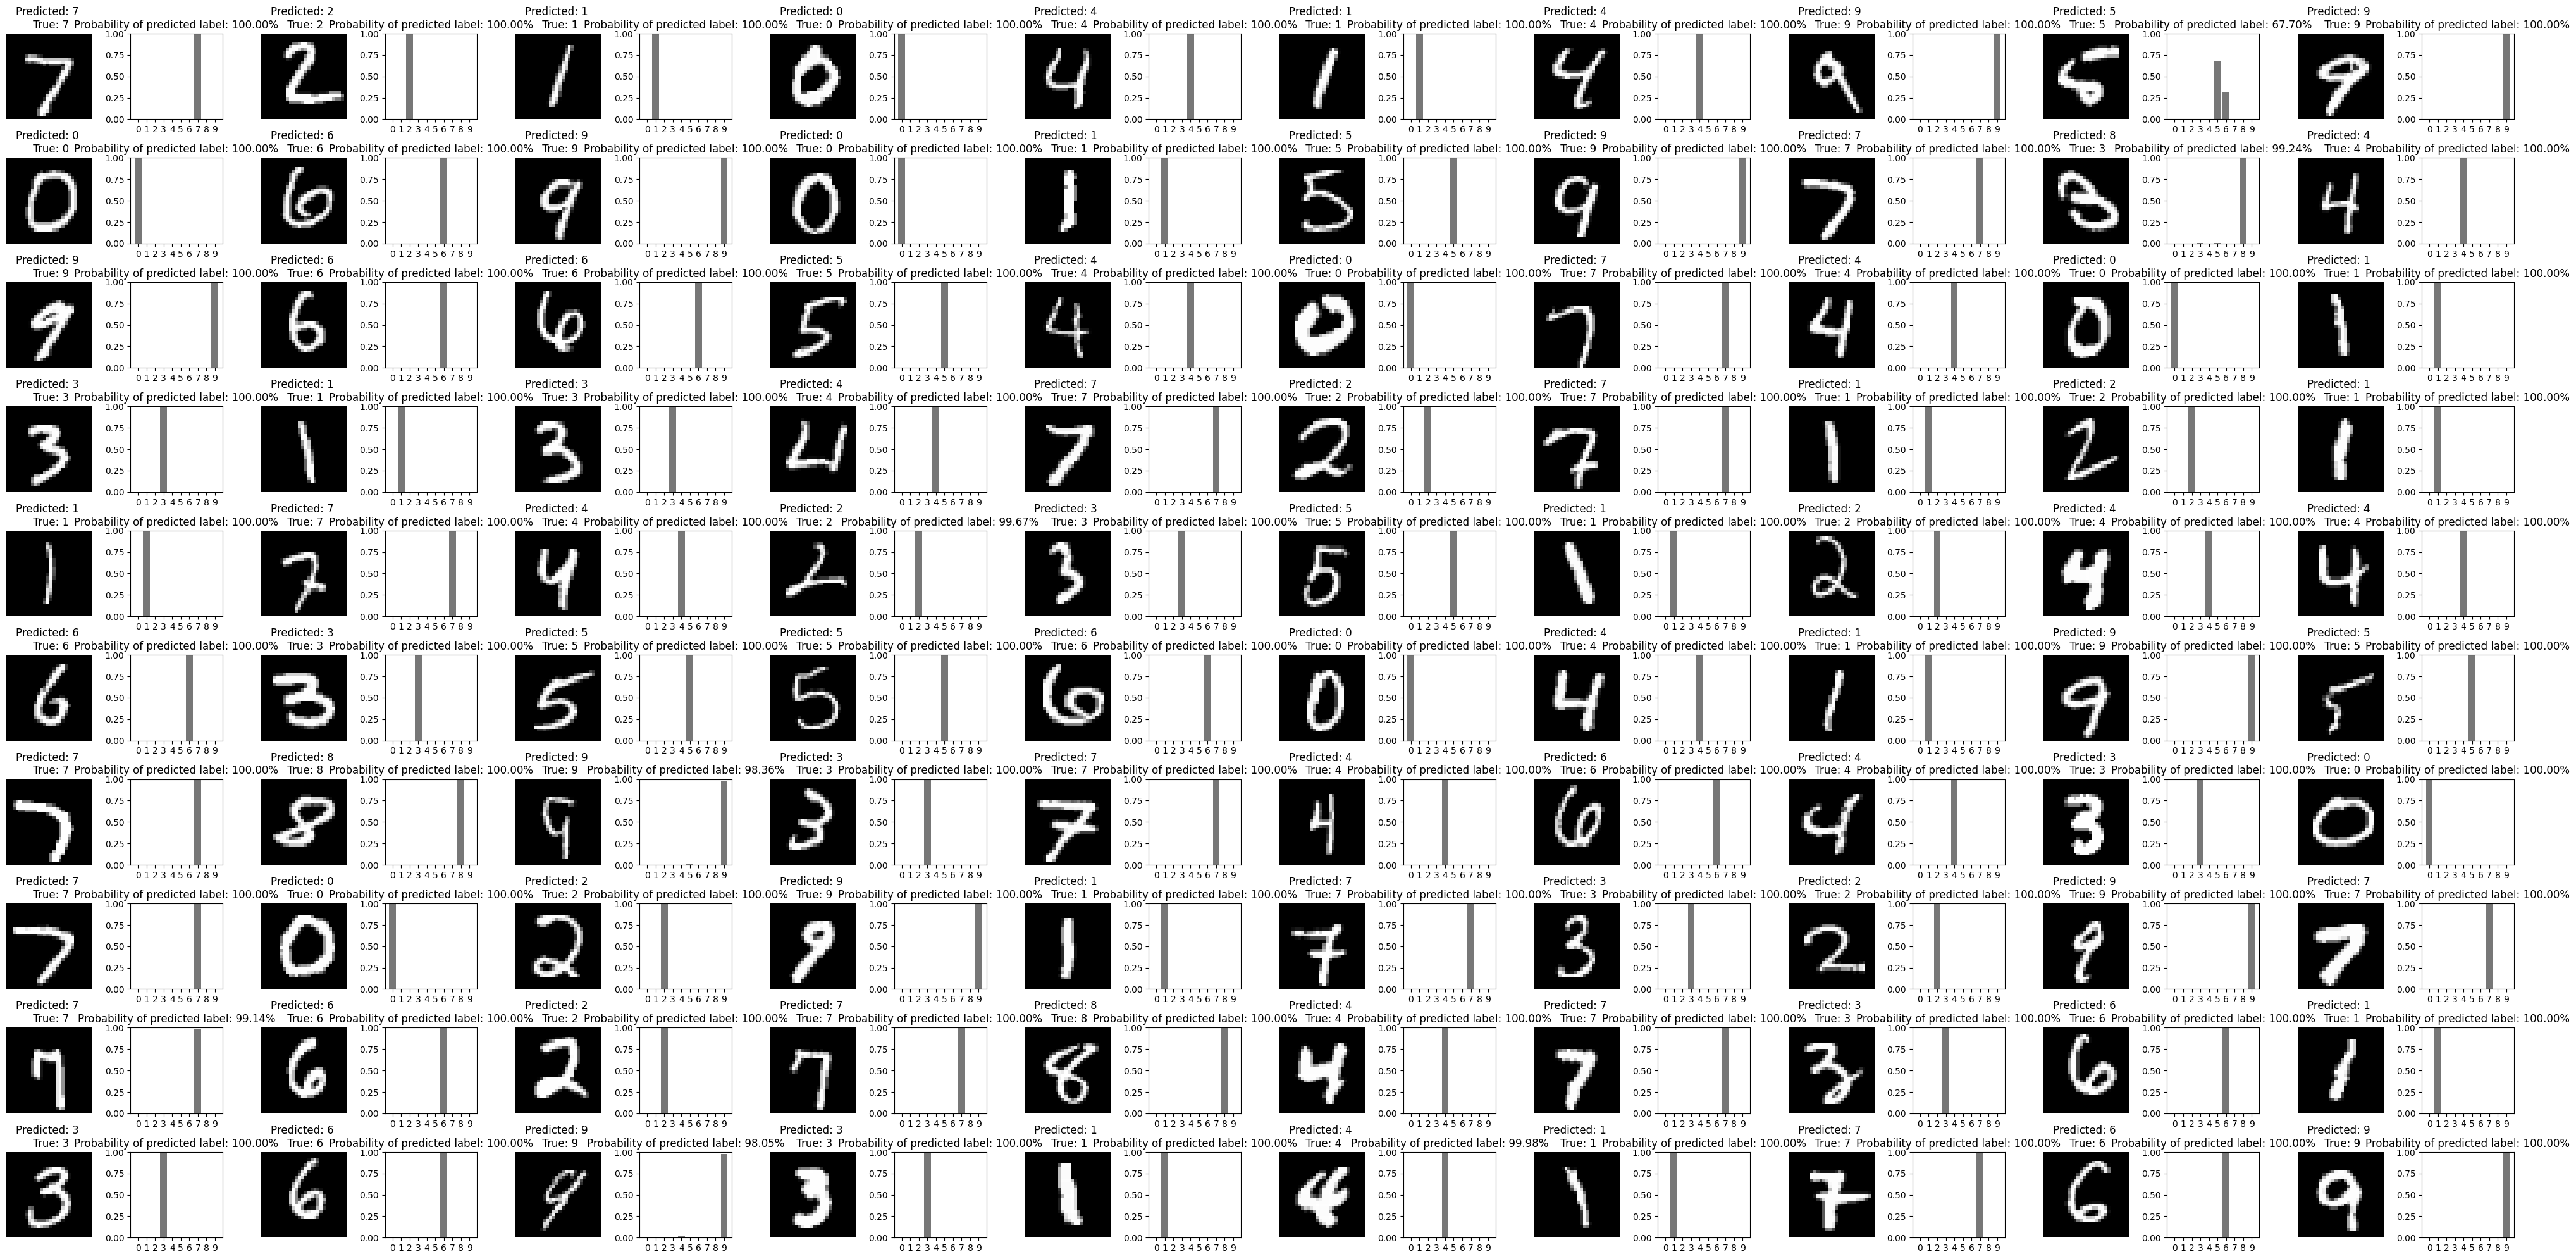

In [17]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Predicted: {} \n True: {}".format(np.argmax(predictions[i]), test_labels[i]))

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(range(10), predictions[i], color="#777777")
    plt.xticks(range(10))
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions[i])
    plt.title("Probability of predicted label: {:.2f}%".format(predictions[i][predicted_label]*100))

plt.tight_layout()
plt.show()
